# Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import boxcox1p
from datetime import date
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

# Get the data

In [2]:
#uploading training and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test_id=test['Id']

In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

combining training & testing data for preposesing after that we do not write same code for test

In [10]:
df=pd.concat([train, test], axis=0, ignore_index=True)

# Exploratory Data Analysis

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [12]:
data=df.copy()

* SalePrice: the variable we're trying to predict

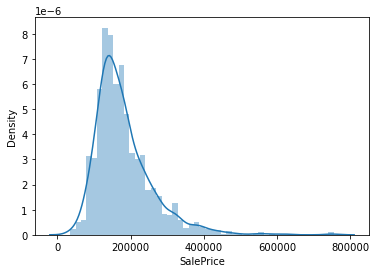

In [13]:
sns.distplot(train['SalePrice'])
plt.show()

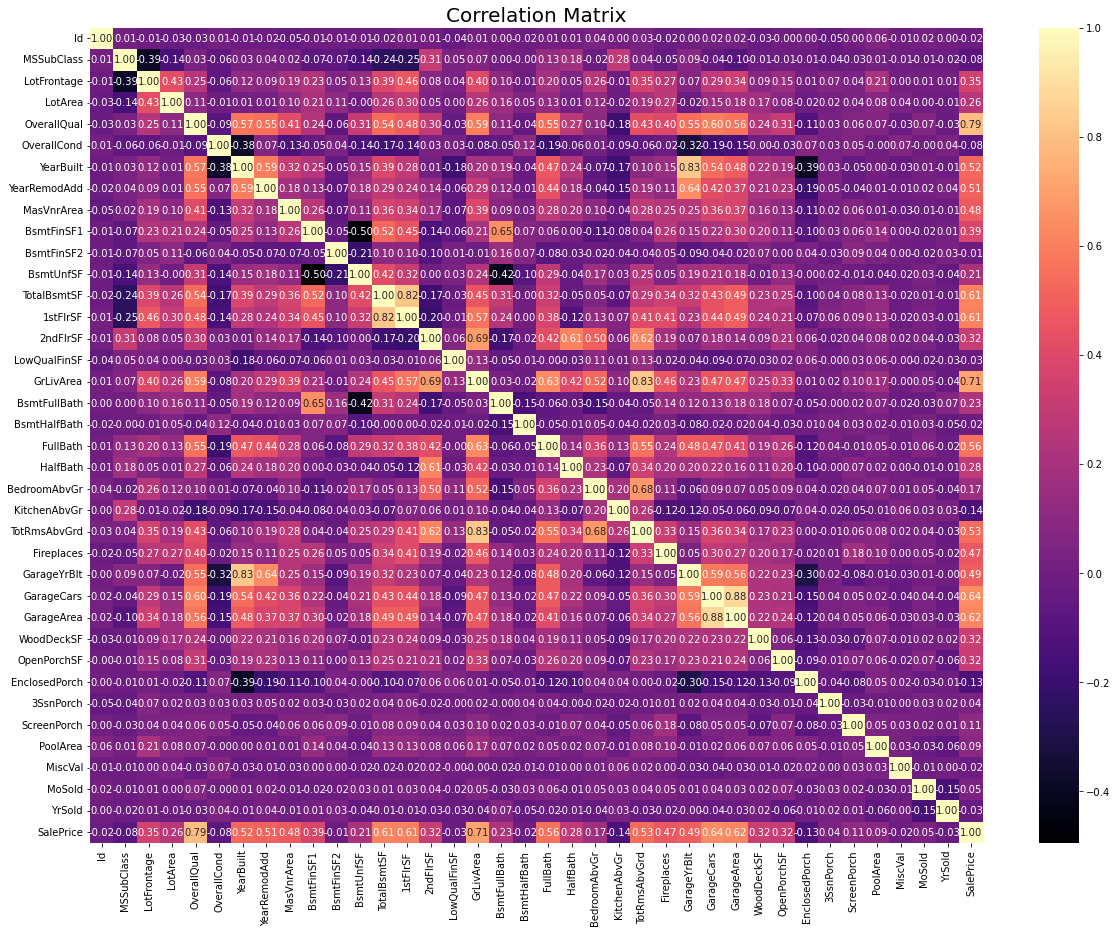

In [14]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(train.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

### Missing Values

In [15]:
columns=list(df.columns)
columns.remove('SalePrice')

In [16]:
df[columns].isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
                 ... 
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [17]:
total_null=df[columns].isnull().sum().sort_values(ascending=False)

In [18]:
percentage=(df.drop('SalePrice', axis=1).isnull().sum()/len(df))
missing_data=pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])

In [19]:
missing_data.head()

,Total,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468


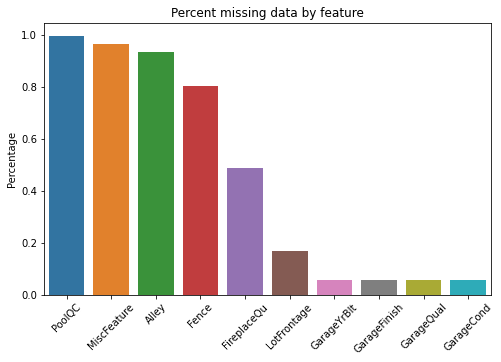

In [20]:
plt.figure(figsize=(8,5))
plt.title('Percent missing data by feature')
sns.barplot(missing_data.head(10).index, missing_data.head(10)['Percentage'])
plt.xticks(rotation=45)
plt.show()

In [21]:
nan=df[columns].isnull().sum().sort_values()/df[columns].shape[0]*100

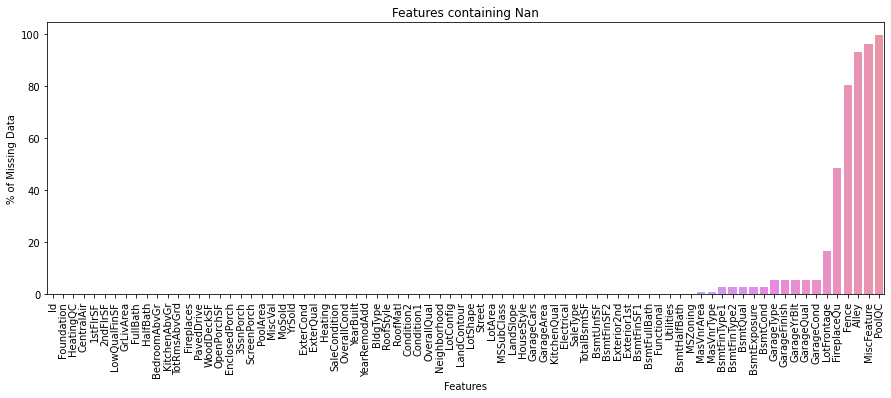

In [22]:
# Plotting Nan

plt.figure(figsize = (15,5))
sns.barplot(x =nan.index, y=nan.values)

plt.xticks(rotation=90)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

Filling Categorical NaN (That we know how to fill due to the description file )

In [23]:
#Total number of nulls
df[columns].isnull().sum().sum()

13965

In [24]:
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'PoolQC', 'Fence']].head()

,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,PoolQC,Fence
0,NaN,Gd,TA,No,GLQ,Unf,NaN,NaN
1,NaN,Gd,TA,Gd,ALQ,Unf,NaN,NaN
2,NaN,Gd,TA,Mn,GLQ,Unf,NaN,NaN
3,NaN,TA,Gd,No,ALQ,Unf,NaN,NaN
4,NaN,Gd,TA,Av,GLQ,Unf,NaN,NaN


In [25]:
df[['GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'FireplaceQu']].head()

,GarageFinish,GarageQual,GarageCond,GarageType,FireplaceQu
0,RFn,TA,TA,Attchd,NaN
1,RFn,TA,TA,Attchd,TA
2,RFn,TA,TA,Attchd,TA
3,Unf,TA,TA,Detchd,Gd
4,RFn,TA,TA,Attchd,TA


In [26]:
df[['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF']].head()

,GarageArea,GarageCars,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF
0,548.0,2.0,706.0,0.0,856.0,150.0
1,460.0,2.0,978.0,0.0,1262.0,284.0
2,608.0,2.0,486.0,0.0,920.0,434.0
3,642.0,3.0,216.0,0.0,756.0,540.0
4,836.0,3.0,655.0,0.0,1145.0,490.0


In [27]:
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].apply(lambda x: x.fillna(x.mode()[0]))

In [28]:
#Group the by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median())) 

In [29]:
for col in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'PoolQC', 'Fence',
           'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'FireplaceQu']:
    
    df[col].fillna('No', inplace=True)

In [30]:
for col in ['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF']:
    df[col].fillna(0, inplace=True)

Some of the non-numeric predictors are stored as numbers; convert them into strings

In [31]:
year_col=[]
for col in df.columns:
    if 'Yr' in col or 'year' in col.lower():
        year_col.append(col)

In [32]:
print(year_col)
year_col.extend(['MSSubClass', 'YrSold', 'MoSold'])

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [33]:
for col in year_col:
    
    df[col]=df[col].astype(str)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [35]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

MiscFeature     0.964029
SalePrice       0.499829
BsmtExposure    0.028092
MasVnrType      0.008222
MasVnrArea      0.007879
                  ...   
Foundation      0.000000
ExterCond       0.000000
ExterQual       0.000000
RoofMatl        0.000000
HeatingQC       0.000000
Length: 81, dtype: float64

In [36]:
df['MiscFeature'] = df['MiscFeature'].fillna("No")

In [37]:
for col in df._get_numeric_data().columns:
    if col!='SalePrice':
        df[col].fillna(df[col].median(), inplace=True)

In [38]:
for col in df.select_dtypes(include=['O']):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [39]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

SalePrice      0.499829
CentralAir     0.000000
GarageYrBlt    0.000000
GarageType     0.000000
FireplaceQu    0.000000
                 ...   
MasVnrArea     0.000000
MasVnrType     0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
HeatingQC      0.000000
Length: 81, dtype: float64

There are no missing values anymore!

# Feature Engineering

In [40]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,12,2008,WD,Normal,250000.0


In [41]:
df.drop('Id', axis=1, inplace=True)

In [42]:
df[['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtQual', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']]

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtQual,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,Fence
0,7,5,Gd,TA,Gd,Gd,Gd,No,TA,TA,No,No
1,6,8,TA,TA,Gd,Gd,TA,TA,TA,TA,No,No
2,7,5,Gd,TA,Gd,Gd,Gd,TA,TA,TA,No,No
3,7,5,TA,TA,TA,TA,Gd,Gd,TA,TA,No,No
4,8,5,Gd,TA,Gd,Gd,Gd,TA,TA,TA,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,7,TA,TA,TA,TA,TA,No,No,No,No,No
2915,4,5,TA,TA,TA,TA,TA,No,TA,TA,No,No
2916,5,7,TA,TA,TA,TA,TA,TA,TA,TA,No,No
2917,5,5,TA,TA,Gd,Gd,TA,No,No,No,No,MnPrv


In [43]:
df[['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
      'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', ]]

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,7,5,Gd,TA,Gd,TA,Ex,Gd,No,TA,TA,No
1,6,8,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,No
2,7,5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,No
3,7,5,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,No
4,8,5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,No
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,7,TA,TA,TA,TA,Gd,TA,No,No,No,No
2915,4,5,TA,TA,TA,TA,TA,TA,No,TA,TA,No
2916,5,7,TA,TA,TA,TA,Ex,TA,TA,TA,TA,No
2917,5,5,TA,TA,Gd,TA,TA,TA,No,No,No,No


In [44]:
qual_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No':0}

In [45]:
df['PoolQC']=df['PoolQC'].map(qual_dict)

In [46]:
df['Fence'] = df['Fence'].map({'No' :0, 'MnWw':1, 'GdWo':2, 'MnPrv': 3, 'GdPrv':4})

In [47]:
df['HeatingQC'] = df['HeatingQC'].map(qual_dict)

In [48]:
df['KitchenQual'] = df['KitchenQual'].map(qual_dict)

In [49]:
df['ExterQual']=df['ExterQual'].map(qual_dict)

In [50]:
df['ExterCond']=df['ExterCond'].map(qual_dict)

In [51]:
df['BsmtQual'] = df['BsmtQual'].map(qual_dict)

In [52]:
df['GarageQual']=df['GarageQual'].map(qual_dict)

In [53]:
df['GarageCond']=df['GarageCond'].map(qual_dict)

In [54]:
BsmtFinType_dict = {'Unf' : 1 , 'No' : 0, 'LwQ' : 2, 'Rec': 3 , 'BLQ' : 4, 'ALQ':5, 'GLQ':6}

df['BsmtFinType2'] = df['BsmtFinType2'].map(BsmtFinType_dict)

In [55]:
df['FireplaceQu']=df['FireplaceQu'].map(qual_dict)

In [56]:
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd':4, 'Av' : 3, 'Mn':2, 'No':0 })

In [57]:
df['TotalSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']

In [58]:
df['Total_porch_sf'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']

In [59]:
df['GrDividedLotArea']=df['GrLivArea']/df['LotArea']

In [60]:
df['KitchenBedroomAbvGr']=df['KitchenAbvGr']+df['BedroomAbvGr']

In [61]:
todays_date = date.today()
df["Building_age"] = todays_date.year - df["YearBuilt"].astype('int')

In [62]:
df['Sold_GarageYrBlt']=df['YrSold'].astype(int)-df['GarageYrBlt'].astype('float')
df['Sold_GarageYrBlt']=df['Sold_GarageYrBlt'].astype(str)

In [63]:
df['Sold_Built']=df['YrSold'].astype(int)-df['YearBuilt'].astype(int)
df['Sold_Built']=df['Sold_Built'].astype(str)

In [64]:
df['Sold_RemodAdd']=df['YrSold'].astype(int)-df['YearRemodAdd'].astype('float')
df['Sold_RemodAdd']=df['Sold_RemodAdd'].astype('str')

In [65]:
df["HighQualSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

In [66]:
df["SqFtPerRoom"] = df["GrLivArea"] / (df["TotRmsAbvGrd"] +
                                                       df["FullBath"] +
                                                       df["HalfBath"] +
                                                       df["KitchenAbvGr"])

In [67]:
df['HasTotalBsmtSF']=[ 0 if i==0 else 1 for i in df['TotalBsmtSF'].astype(int) ]

In [68]:
df['Has2ndFlrSF']=[ 0 if i==0 else 1 for i in df['2ndFlrSF'].astype(int) ]

In [69]:
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [70]:
df['Has2ndfloor']=df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

In [71]:
df['HasGarage']=df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

In [72]:
df['HasBsmt']=df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [73]:
df['Hasfireplace']=df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [74]:
#finding numeric column from data
num_cols=list(df._get_numeric_data().columns)
print(num_cols)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'SalePrice', 'TotalSF', 'Total_porch_sf', 'GrDividedLotArea', 'KitchenBedroomAbvGr', 'Building_age', 'HighQualSF', 'SqFtPerRoom', 'HasTotalBsmtSF', 'Has2ndFlrSF', 'HasPool', 'Has2ndfloor', 'HasGarage', 'HasBsmt', 'Hasfireplace']


In [75]:
print(f"Numeric variable numbers: {len(num_cols)}")

Numeric variable numbers: 57


In [76]:
cat_cols=list(set(df.columns)-set(num_cols))
print(cat_cols)

['Street', 'Exterior2nd', 'Utilities', 'Electrical', 'Condition1', 'MoSold', 'MSSubClass', 'GarageFinish', 'RoofMatl', 'LandContour', 'Exterior1st', 'MiscFeature', 'HouseStyle', 'LotConfig', 'LotShape', 'SaleCondition', 'Functional', 'Condition2', 'Alley', 'RoofStyle', 'Sold_GarageYrBlt', 'BsmtCond', 'CentralAir', 'BsmtFinType1', 'MasVnrType', 'Neighborhood', 'SaleType', 'Sold_Built', 'Foundation', 'BldgType', 'YearBuilt', 'YrSold', 'PavedDrive', 'Sold_RemodAdd', 'Heating', 'MSZoning', 'GarageType', 'GarageYrBlt', 'LandSlope', 'YearRemodAdd']


In [77]:
print('Categorical Features:{}'.format(len(cat_cols)))

Categorical Features:40


##### Sale price analysis

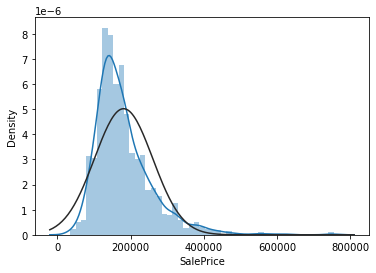

In [78]:
sns.distplot(df[df['SalePrice'].notnull()]['SalePrice'], fit=stats.norm)
plt.show()

In [79]:
print("Skewness coeff. is: %f" % df[df['SalePrice'].notnull()]['SalePrice'].skew())

Skewness coeff. is: 1.882876


In [80]:
print("Kurtosis coeff. is: %f" % df[df['SalePrice'].notnull()]['SalePrice'].kurt())

Kurtosis coeff. is: 6.536282


In [81]:
# log(1+x) transform
df['SalePrice']=np.log1p(df['SalePrice'])

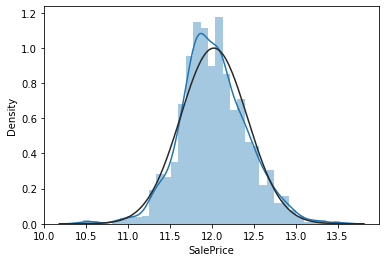

In [82]:
sns.distplot(df[df['SalePrice'].notnull()]['SalePrice'], fit=stats.norm)
plt.show()

##### Numerical Variable Analysis

In [83]:
def hist_for_nums(df, numeric_cols):
    for col in numeric_cols:
        df[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()

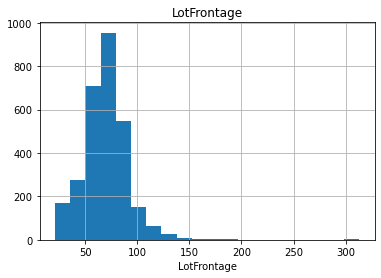

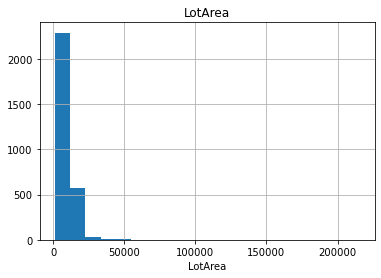

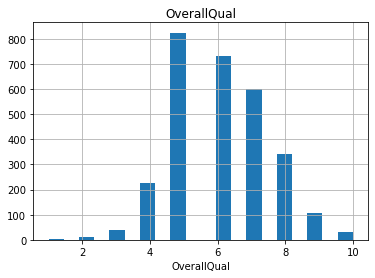

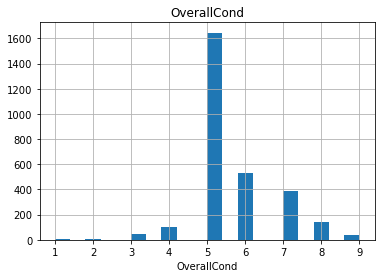

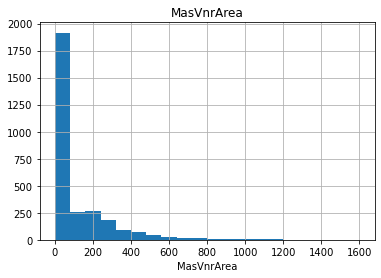

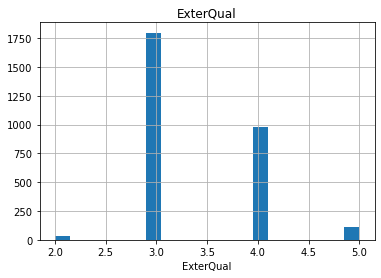

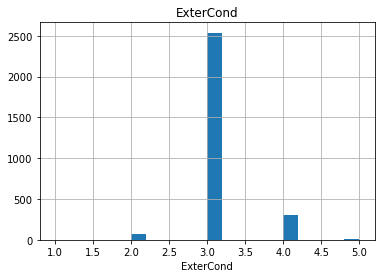

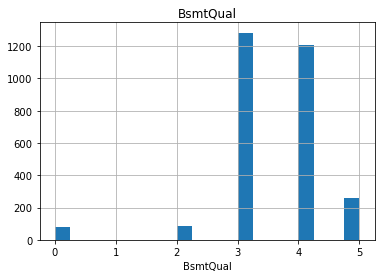

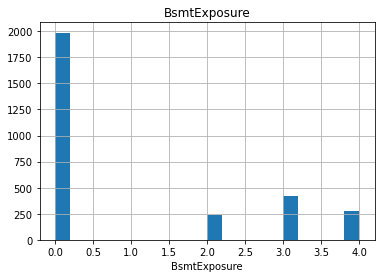

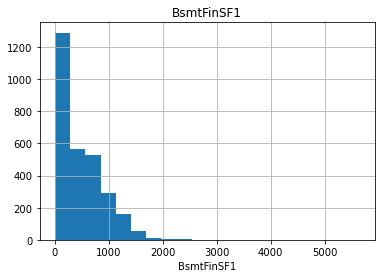

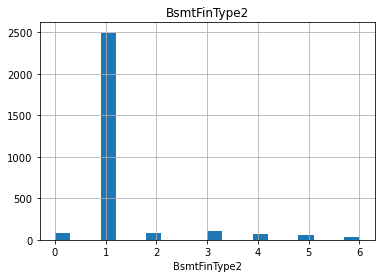

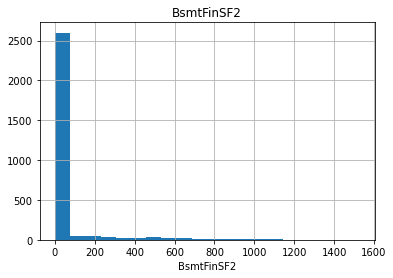

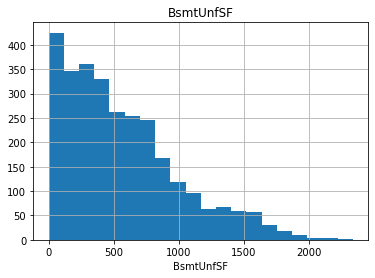

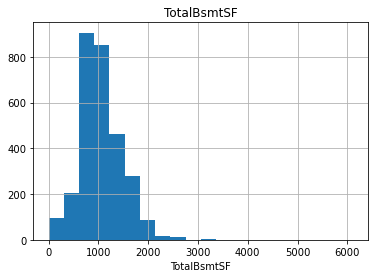

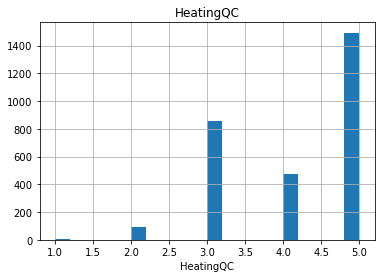

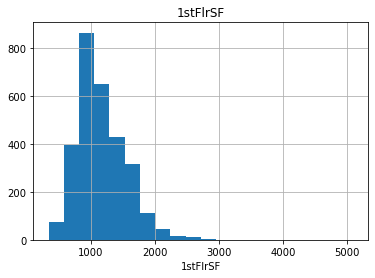

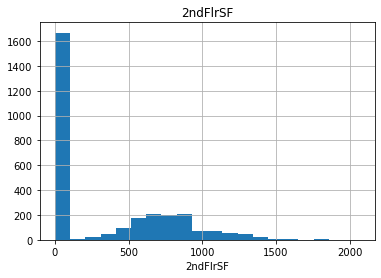

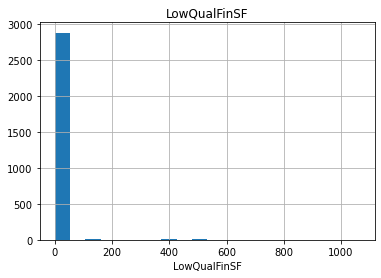

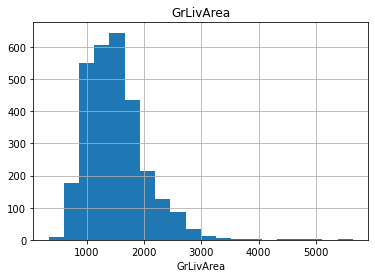

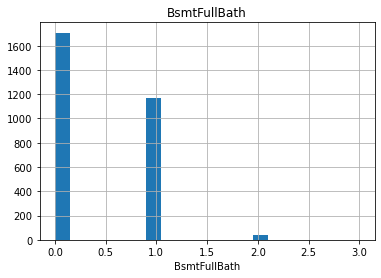

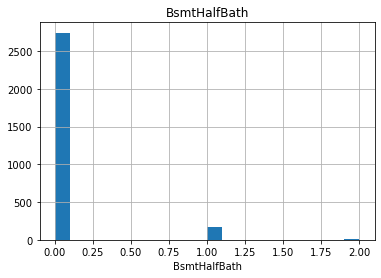

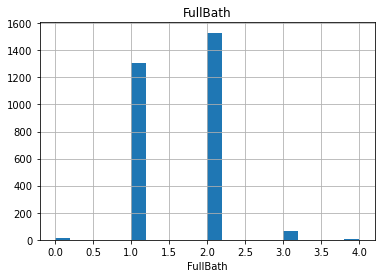

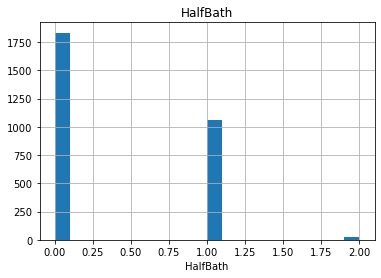

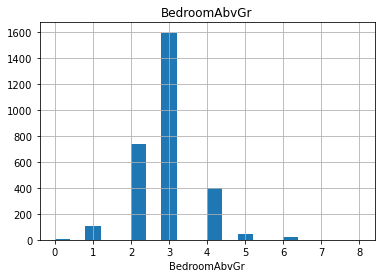

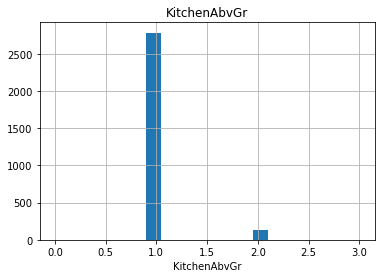

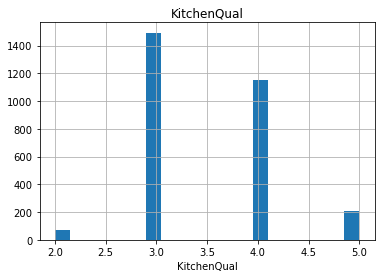

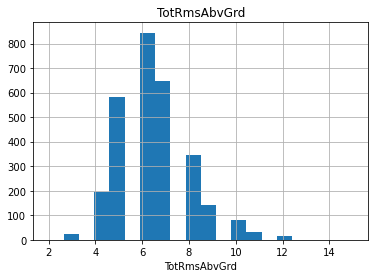

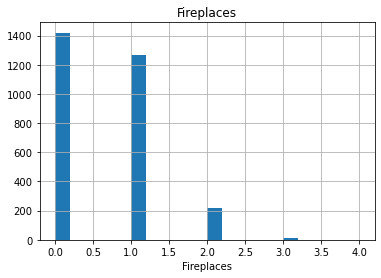

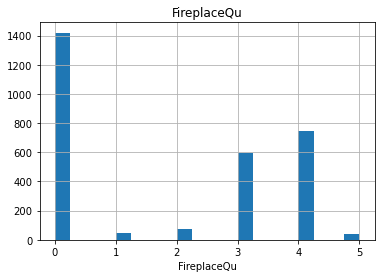

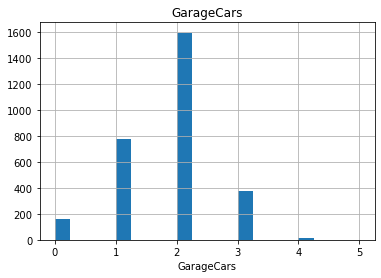

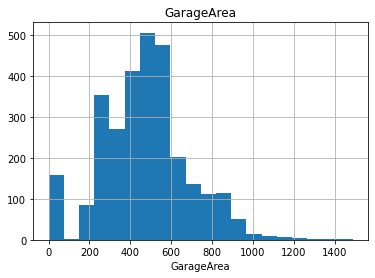

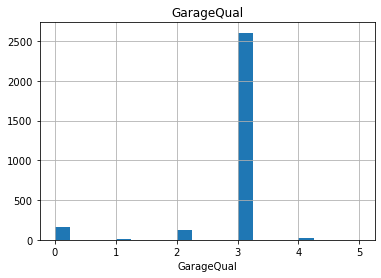

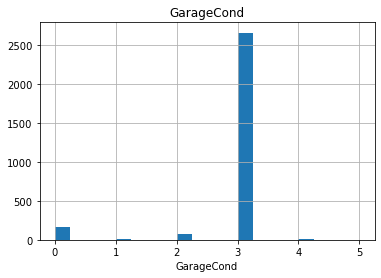

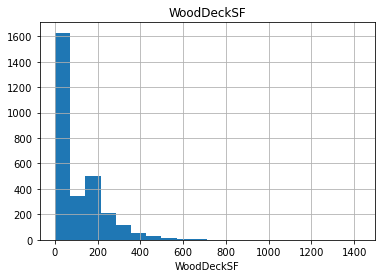

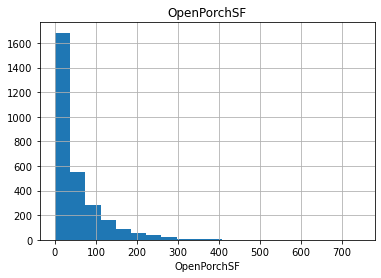

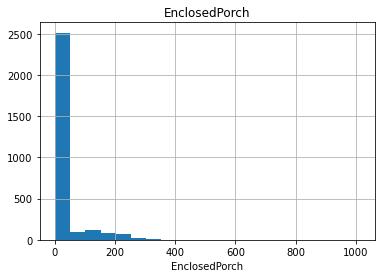

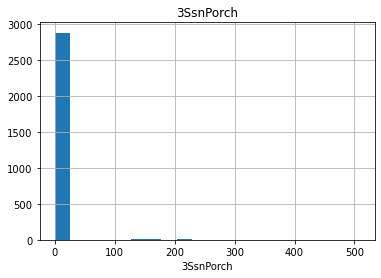

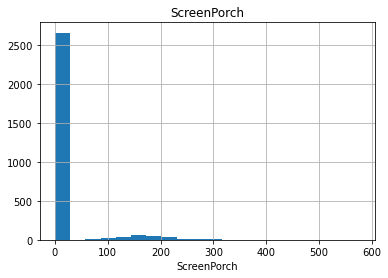

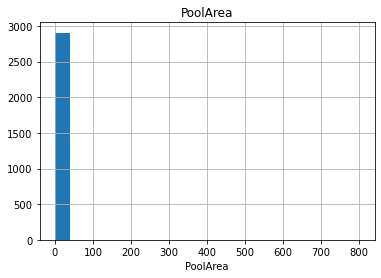

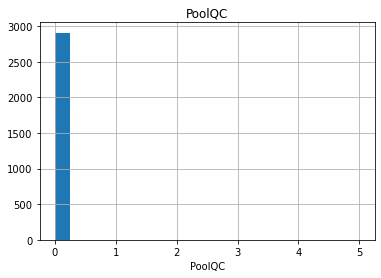

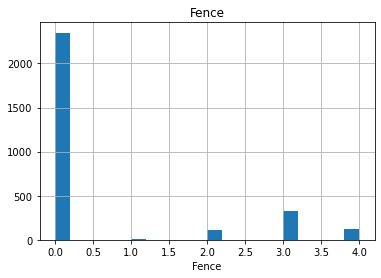

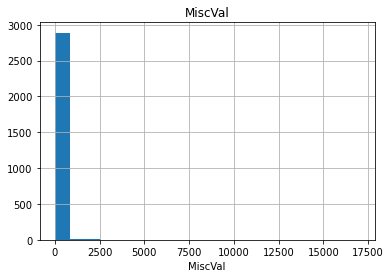

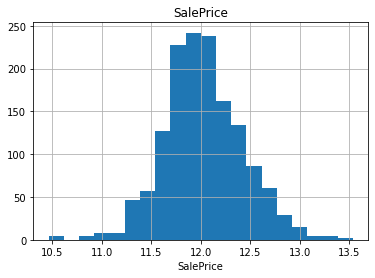

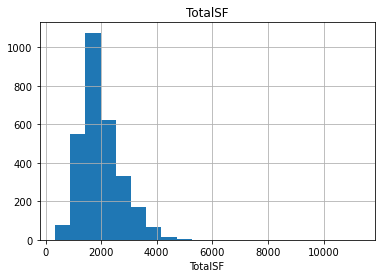

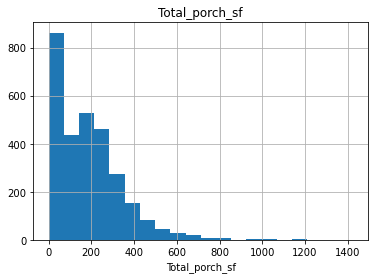

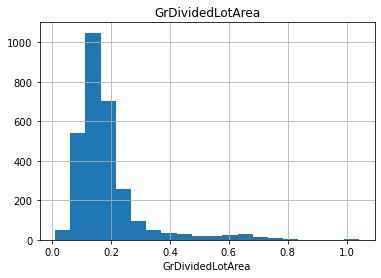

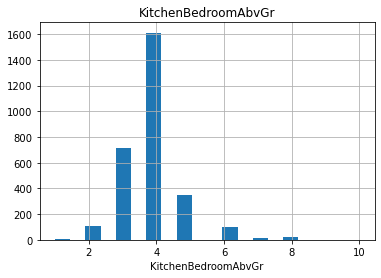

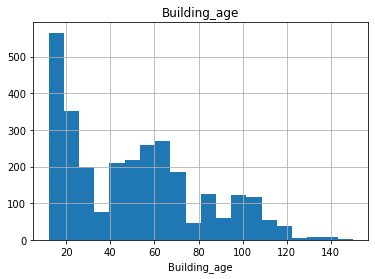

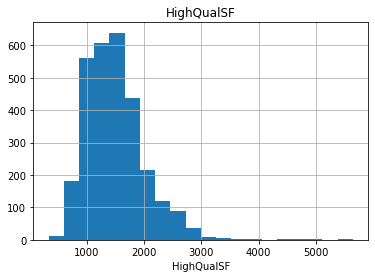

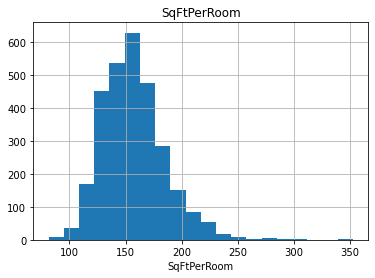

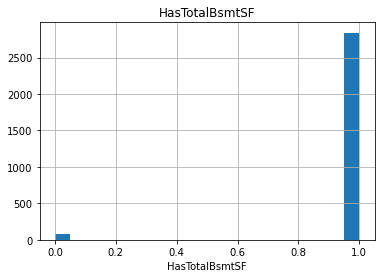

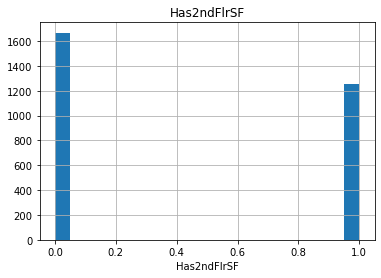

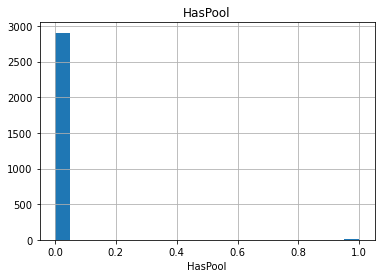

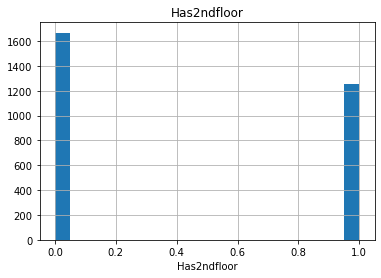

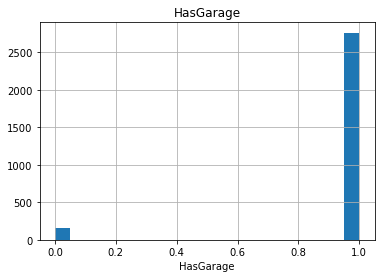

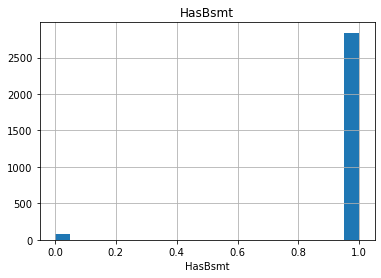

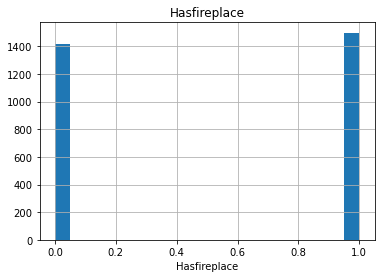

In [84]:
hist_for_nums(df, num_cols)

##### Categorical Variable Analysis

In [85]:
#count total value in every catgorical feature
for cat in cat_cols:
    print(f'##########{cat}##########')
    print(df[cat].value_counts(normalize=True))

##########Street##########
Pave    0.995889
Grvl    0.004111
Name: Street, dtype: float64
##########Exterior2nd##########
VinylSd    0.347722
MetalSd    0.153135
HdBoard    0.139089
Wd Sdng    0.133950
Plywood    0.092497
CmentBd    0.043165
Wd Shng    0.027749
BrkFace    0.016101
Stucco     0.016101
AsbShng    0.013018
Brk Cmn    0.007537
ImStucc    0.005139
Stone      0.002055
AsphShn    0.001370
CBlock     0.001028
Other      0.000343
Name: Exterior2nd, dtype: float64
##########Utilities##########
AllPub    0.999657
NoSeWa    0.000343
Name: Utilities, dtype: float64
##########Electrical##########
SBrkr    0.915382
FuseA    0.064406
FuseF    0.017129
FuseP    0.002741
Mix      0.000343
Name: Electrical, dtype: float64
##########Condition1##########
Norm      0.860226
Feedr     0.056184
Artery    0.031518
RRAn      0.017129
PosN      0.013361
RRAe      0.009592
PosA      0.006852
RRNn      0.003083
RRNe      0.002055
Name: Condition1, dtype: float64
##########MoSold##########
6     0.

In [86]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Sold_RemodAdd,HighQualSF,SqFtPerRoom,HasTotalBsmtSF,Has2ndFlrSF,HasPool,Has2ndfloor,HasGarage,HasBsmt,Hasfireplace
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,5.0,1710,142.500000,1,1,0,1,1,1,0
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,31.0,1262,140.222222,1,0,0,0,1,1,1
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,6.0,1786,178.600000,1,1,0,1,1,1,1
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,36.0,1717,190.777778,1,1,0,1,1,1,1
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,8.0,2198,169.076923,1,1,0,1,1,1,1


##### Independent variable analysis

In [87]:
num_cols.remove('SalePrice')

In [88]:
skewed_feats=df[num_cols].skew().sort_values(ascending=False)

In [89]:
skewed_feats.head(10)

MiscVal          21.958480
PoolQC           18.418603
PoolArea         16.907017
HasPool          14.891972
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
KitchenAbvGr      4.304467
BsmtFinSF2        4.148275
EnclosedPorch     4.005950
dtype: float64

In [90]:
skewed_features=(skewed_feats[skewed_feats>0.5]).index
print(skewed_features)

Index(['MiscVal', 'PoolQC', 'PoolArea', 'HasPool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'BsmtFinType2', 'GrDividedLotArea',
       'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'TotalSF', 'Fence',
       'LotFrontage', '1stFlrSF', 'BsmtFinSF1', 'Total_porch_sf', 'ExterCond',
       'GrLivArea', 'HighQualSF', 'TotalBsmtSF', 'BsmtExposure', 'BsmtUnfSF',
       'SqFtPerRoom', 'KitchenBedroomAbvGr', '2ndFlrSF', 'ExterQual',
       'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'BsmtFullBath',
       'Building_age', 'OverallCond'],
      dtype='object')


In [91]:
print(len(skewed_features))

39


In [92]:
#for col in skewed_features:
#     df[col] = boxcox1p(df[col], stats.boxcox_normmax(df[col] + 1))

In [93]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Sold_RemodAdd,HighQualSF,SqFtPerRoom,HasTotalBsmtSF,Has2ndFlrSF,HasPool,Has2ndfloor,HasGarage,HasBsmt,Hasfireplace
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,5.0,1710,142.500000,1,1,0,1,1,1,0
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,31.0,1262,140.222222,1,0,0,0,1,1,1
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,6.0,1786,178.600000,1,1,0,1,1,1,1
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,36.0,1717,190.777778,1,1,0,1,1,1,1
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,8.0,2198,169.076923,1,1,0,1,1,1,1


##### Outliers

In [94]:
df[df['GarageYrBlt']=='2207.0']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Sold_RemodAdd,HighQualSF,SqFtPerRoom,HasTotalBsmtSF,Has2ndFlrSF,HasPool,Has2ndfloor,HasGarage,HasBsmt,Hasfireplace
2592,20,RL,68.0,8298,Pave,No,IR1,HLS,AllPub,Inside,...,0.0,1564,173.777778,1,0,0,0,1,1,1


In [95]:
df.loc[df['GarageYrBlt']=='2207.0', 'GarageYrBlt']='2007.0'

In [96]:
df.drop(df[(df['GrLivArea']>4500) & (df['SalePrice']<300000) ].index, inplace=True)

##### Encode categorical features

In [97]:
df=pd.get_dummies(df, drop_first=True)

In [98]:
train=df[df['SalePrice'].notnull()]
test=df[df['SalePrice'].isnull()].drop('SalePrice', axis=1)

In [99]:
train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,...,Sold_RemodAdd_55.0,Sold_RemodAdd_56.0,Sold_RemodAdd_57.0,Sold_RemodAdd_58.0,Sold_RemodAdd_59.0,Sold_RemodAdd_6.0,Sold_RemodAdd_60.0,Sold_RemodAdd_7.0,Sold_RemodAdd_8.0,Sold_RemodAdd_9.0
0,65.0,8450,7,5,196.0,4,3,4,0,706.0,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,6,8,0.0,3,3,4,4,978.0,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,7,5,162.0,4,3,4,2,486.0,...,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,7,5,0.0,3,3,3,0,216.0,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,8,5,350.0,4,3,4,3,655.0,...,0,0,0,0,0,0,0,0,1,0


In [100]:
test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,...,Sold_RemodAdd_55.0,Sold_RemodAdd_56.0,Sold_RemodAdd_57.0,Sold_RemodAdd_58.0,Sold_RemodAdd_59.0,Sold_RemodAdd_6.0,Sold_RemodAdd_60.0,Sold_RemodAdd_7.0,Sold_RemodAdd_8.0,Sold_RemodAdd_9.0
1460,80.0,11622,5,6,0.0,3,3,3,0,468.0,...,0,0,0,0,0,0,0,0,0,0
1461,81.0,14267,6,6,108.0,3,3,3,0,923.0,...,0,0,0,0,0,0,0,0,0,0
1462,74.0,13830,5,5,0.0,3,3,4,0,791.0,...,0,0,0,0,0,0,0,0,0,0
1463,78.0,9978,6,6,20.0,3,3,3,0,602.0,...,0,0,0,0,0,0,0,0,0,0
1464,43.0,5005,8,5,0.0,4,3,4,0,263.0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X = train.drop(["SalePrice"], axis=1)
Y=train[['SalePrice']]

###### Feature transformations

In [102]:
X[num_cols]=np.log1p(X[num_cols])
test[num_cols]=np.log1p(test[num_cols])

### Scaler

here we use Robust scaler for scaling numeric fields

In [103]:
scaler = RobustScaler()

In [104]:
scaler.fit(X[num_cols])

RobustScaler()

In [105]:
X[num_cols]=scaler.transform(X[num_cols])

In [106]:
test[num_cols]=scaler.transform(test[num_cols])

In [107]:
def submission(test_id, predict):
    res=pd.DataFrame()
    res['SalePrice']=np.around(predict, 2)
    res['Id']=test_id
    return res[['Id', 'SalePrice']]

In [108]:
#0.Score: 0.12205
alphas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 5e-2, 0.1, 0.3, 1, 3, 5, 
          10, 15, 18, 20, 30, 50, 75, 100, 0.001, 0.0005, 0.007]
model_cv=LassoCV(alphas=alphas, cv=20)
model_cv.fit(X, Y)

LassoCV(alphas=[0.1, 0.01, 0.001, 0.0001, 1e-15, 1e-10, 1e-08, 0.0009, 0.0007,
                0.0005, 0.0003, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50,
                75, 100, 0.001, 0.0005, 0.007],
        cv=20)

In [109]:
model_tuned=Lasso(alpha=model_cv.alpha_, max_iter=50000)
model_tuned.fit(X, Y)

Lasso(alpha=0.0007, max_iter=50000)

In [110]:
pre=model_tuned.predict(test)
res=submission(test_id, pre)
res['SalePrice']=np.exp(res['SalePrice'])
res.to_csv('submission.csv', index=False)